In [14]:
print("hello world")

hello world


In [15]:
import torch

torch.__version__

'2.2.1'

## Torch Tensor
* dim: dimension
* ndim: number of dimension
* 

In [16]:
t = torch.Tensor([[1,2,3,4,5,6,7,8,9],
                  [11,12,13,14,15,16,17,18,19]])
type(t), t.ndim, t.shape, t.size() # return representation of shape of a tensor

(torch.Tensor, 2, torch.Size([2, 9]), torch.Size([2, 9]))

In [17]:
a = t.numpy()
type(a), a.ndim, a.shape, a.size

(numpy.ndarray, 2, (2, 9), 18)

In [18]:
t1 = torch.tensor(a)
type(t1), t1.ndim, t1.shape, t1.size

(torch.Tensor, 2, torch.Size([2, 9]), <function Tensor.size>)

In [19]:
# use a Tensor instance to represent a gray image,
# the number is between [0,255] to represent the grey degree
image = torch.Tensor(((12, 124),(34, 255),(67, 110)))
type(image), image.shape

(torch.Tensor, torch.Size([3, 2]))

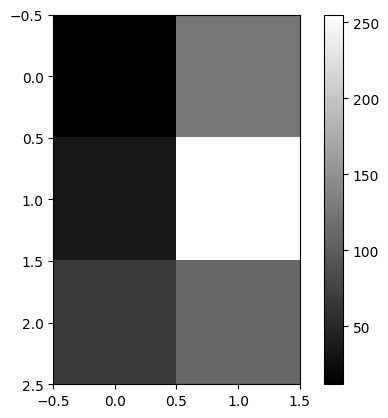

In [20]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

## Use functions empty(), ones(), zeros()

In [21]:
t = torch.empty(10,2)
t, type(t), t.ndim, t.shape

(tensor([[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]),
 torch.Tensor,
 2,
 torch.Size([10, 2]))

In [22]:
t = torch.ones(10)
t, type(t), t.ndim, t.shape

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 torch.Tensor,
 1,
 torch.Size([10]))

In [23]:
t = torch.zeros(10,2)
t, type(t), t.ndim, t.shape

(tensor([[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]),
 torch.Tensor,
 2,
 torch.Size([10, 2]))

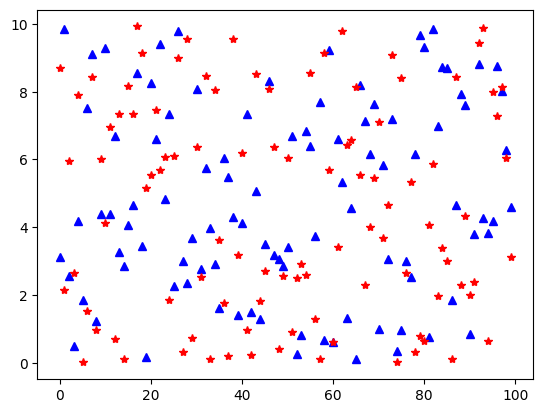

In [24]:
x = torch.empty(size=(2,100)).uniform_(0,10)
#create 2D array, 2 rows and 100 number which is uniformly distributed between 0 and 10.
plt.plot(x.numpy()[0],'b^')
plt.plot(x.numpy()[1],'r*')
plt.show()

In [25]:
t[0][1]=3
t[3][1]=4
t[6][0]=6
t,t.shape

(tensor([[0., 3.],
         [0., 0.],
         [0., 0.],
         [0., 4.],
         [0., 0.],
         [0., 0.],
         [6., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]),
 torch.Size([10, 2]))

In [26]:
t1 = t.reshape(4,5)
t1,t1.T

(tensor([[0., 3., 0., 0., 0.],
         [0., 0., 4., 0., 0.],
         [0., 0., 6., 0., 0.],
         [0., 0., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0.],
         [3., 0., 0., 0.],
         [0., 4., 6., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]))

## Tensor Operation
1. +,-,*,/
2. sum(), sin(), cos(), numel()

In [27]:
x = torch.numel(t)
x1 = torch.sum(t)
x,x1

(20, tensor(13.))

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



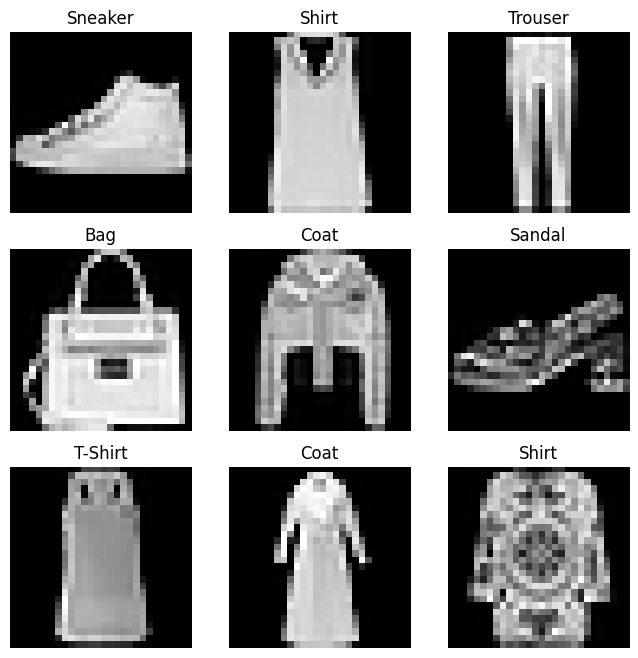

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # get random index
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()